Data contains details of various drugs (used for conditions like Acne, Cancer, Heart Disease, etc. ) and their side effects

Drugs detail URLs were collected from following dataset

Major Column Descriptors:

generic_name:
The chemical name of the drug (not brand name)
drug_classes:
The drug belongs to which drug class, i.e a drug class is a set of medications and other compounds that have a similar chemical structure, the same mechanism of action (i.e. binding to the same biological target), a related mode of action, and/or are used to treat the same disease.
brand_names:
brand names in which the drugs are being sold or available in the market.
activity:
Activity is based on recent site visitor activity relative to other medications in the list. Data was gathered from https://www.drugs.com
rx_otc:
Rx-to-OTC switch is the transfer of proven prescription drugs to nonprescription, where
OTC (Over-the-counter) = Medication that can be purchased without a medical prescription
Rx = Prescription Needed
Rx/OTC = Prescription or Over-the-counter.

pregnancy_category:
A = Adequate and well-controlled studies have failed to demonstrate a risk to the fetus in the first trimester of pregnancy (and there is no evidence of risk in later trimesters).
B = Animal reproduction studies have failed to demonstrate a risk to the fetus and there are no adequate and well-controlled studies in pregnant women.
C = Animal reproduction studies have shown an adverse effect on the fetus and there are no adequate and well-controlled studies in humans, but potential benefits may warrant use in pregnant women despite potential risks.
D = There is positive evidence of human fetal risk based on adverse reaction data from investigational or marketing experience or studies in humans, but potential benefits may warrant use in pregnant women despite potential risks.
X = Studies in animals or humans have demonstrated fetal abnormalities and/or there is positive evidence of human fetal risk based on adverse reaction data from investigational or marketing experience, and the risks involved in use in pregnant women clearly outweigh potential benefits.
N = FDA has not classified the drug.

csa:

Controlled Substances Act (CSA) Schedule
M = The drug has multiple schedules. The schedule may depend on the exact dosage form or strength of the medication.
U = CSA Schedule is unknown.
N = Is not subject to the Controlled Substances Act.
1 = Has a high potential for abuse. Has no currently accepted medical use in treatment in the United States. There is a lack of accepted safety for use under medical supervision.
2 = Has a high potential for abuse. Has a currently accepted medical use in treatment in the United States or a currently accepted medical use with severe restrictions. Abuse may lead to severe psychological or physical dependence.
3 = Has a potential for abuse less than those in schedules 1 and 2. Has a currently accepted medical use in treatment in the United States. Abuse may lead to moderate or low physical dependence or high psychological dependence.
4 = Has a low potential for abuse relative to those in schedule 3. It has a currently accepted medical use in treatment in the United States. Abuse may lead to limited physical dependence or psychological dependence relative to those in schedule 3.
5 = Has a low potential for abuse relative to those in schedule 4. Has a currently accepted medical use in treatment in the United States. Abuse may lead to limited physical dependence or psychological dependence relative to those in schedule 4.

alcohol:
X = Interacts with Alcohol.

rating:
For ratings, users were asked how effective they found the medicine while considering positive/adverse effects and ease of use (1 = not effective, 10 = most effective).

All other columns are self-explanatory.

URL:
https://www.kaggle.com/datasets/jithinanievarghese/drugs-side-effects-and-medical-condition?select=drugs_side_effects_drugs_com.csv

## Basic operations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
file = 'drugs_side_effects_drugs_com.csv'

In [3]:
df = pd.read_csv(file)
df.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


# Basic analysis

In [4]:
df.shape

(2931, 17)

In [5]:
df.columns

Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link',
       'medical_condition_url'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_description  2931 non-null   o

There are __17 variables__, out of them __2 are continous__, __15 categorical__. 

In [7]:
df.isna().sum()

drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64

There are many __nan__ numbers, let's see whether will be needed.

In [8]:
df['medical_condition'].unique()

array(['Acne', 'ADHD', 'AIDS/HIV', 'Allergies', "Alzheimer's", 'Angina',
       'Anxiety', 'Asthma', 'Bipolar Disorder', 'Bronchitis', 'Cancer',
       'Cholesterol', 'Colds & Flu', 'Constipation', 'COPD', 'Covid 19',
       'Depression', 'Diabetes (Type 1)', 'Diabetes (Type 2)', 'Diarrhea',
       'Eczema', 'Erectile Dysfunction', 'Gastrointestinal',
       'GERD (Heartburn)', 'Gout', 'Hair Loss', 'Hayfever', 'Herpes',
       'Hypertension', 'Hypothyroidism', 'IBD (Bowel)', 'Incontinence',
       'Insomnia', 'Menopause', 'Migraine', 'Osteoarthritis',
       'Osteoporosis', 'Pain', 'Pneumonia', 'Psoriasis',
       'Rheumatoid Arthritis', 'Schizophrenia', 'Seizures', 'Stroke',
       'Swine Flu', 'UTI', 'Weight Loss'], dtype=object)

In [9]:
df['side_effects'].unique()

array(['(hives, difficult breathing, swelling in your face or throat) or a severe skin reaction (fever, sore throat, burning in your eyes, skin pain, red or purple skin rash that spreads and causes blistering and peeling). Seek medical treatment if you have a serious drug reaction that can affect many parts of your body. Symptoms may include: skin rash, fever, swollen glands, flu-like symptoms, muscle aches, severe weakness, unusual bruising, or yellowing of your skin or eyes. This reaction may occur several weeks after you began using doxycycline. Doxycycline may cause serious side effects. Call your doctor at once if you have: severe stomach pain, diarrhea that is watery or bloody; throat irritation, trouble swallowing; chest pain, irregular heart rhythm, feeling short of breath; little or no urination; low white blood cell counts - fever, chills, swollen glands, body aches, weakness, pale skin, easy bruising or bleeding; severe headaches, ringing in your ears, dizziness, nausea, vis

In [10]:
df['drug_name'].describe()

count              2931
unique             2912
top       triamcinolone
freq                  3
Name: drug_name, dtype: object

In [11]:
df['generic_name'].describe()

count                2888
unique               1392
top       diphenhydramine
freq                   17
Name: generic_name, dtype: object

In [12]:
df['side_effects'].describe()

count                                                  2807
unique                                                 2759
top       hives ; difficult breathing; swelling of your ...
freq                                                     10
Name: side_effects, dtype: object

# EDA

In [13]:
df.columns

Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link',
       'medical_condition_url'],
      dtype='object')

In [14]:
top_10_conditions = df['medical_condition'].value_counts().head(10)

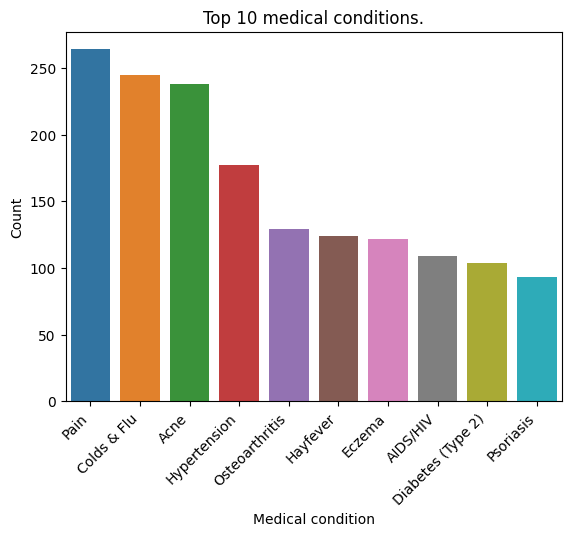

In [15]:
ax_1 = sns.barplot( x = top_10_conditions.index, y = top_10_conditions.values)
ax_1.set(title = 'Top 10 medical conditions.')
ax_1.set_xticklabels(ax_1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Medical condition')
plt.ylabel('Count')
plt.show()

In [16]:
df.sort_values(['no_of_reviews', 'rating' ], ascending = False).head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
2908,phentermine,Weight Loss,hives ; difficult breathing; swelling of your ...,phentermine,"Anorexiants, CNS stimulants","Adipex-P, Lomaira, Suprenza",95%,Rx,X,4,X,NaN,Weight Loss (Obesity/Overweight) More than hal...,8.7,2934.0,https://www.drugs.com/phentermine.html,https://www.drugs.com/condition/obesity.html
2920,bupropion / naltrexone,Weight Loss,"fever, swollen glands, mouth sores, muscle or ...",bupropion and naltrexone,Anorexiants,Contrave,4%,Rx,X,N,X,NaN,Weight Loss (Obesity/Overweight) More than hal...,6.6,2013.0,https://www.drugs.com/mtm/bupropion-and-naltre...,https://www.drugs.com/condition/obesity.html
2910,Contrave,Weight Loss,"fever, swollen glands, mouth sores, muscle or ...",bupropion and naltrexone,Anorexiants,NaN,23%,Rx,X,N,X,NaN,Weight Loss (Obesity/Overweight) More than hal...,6.6,1939.0,https://www.drugs.com/contrave.html,https://www.drugs.com/condition/obesity.html
523,escitalopram,Anxiety,skin rash or hives ; difficulty breathing; swe...,escitalopram,Selective serotonin reuptake inhibitors,Lexapro,28%,Rx,C,N,X,NaN,Anxiety Other names: Anxiety States; Nerves; N...,7.4,1471.0,https://www.drugs.com/escitalopram.html,https://www.drugs.com/condition/anxiety.html
2917,Saxenda,Weight Loss,hives; fast heartbeats; dizziness; trouble bre...,liraglutide,Incretin mimetics,Victoza,12%,Rx,C,N,X,NaN,Weight Loss (Obesity/Overweight) More than hal...,7.5,1377.0,https://www.drugs.com/saxenda.html,https://www.drugs.com/condition/obesity.html


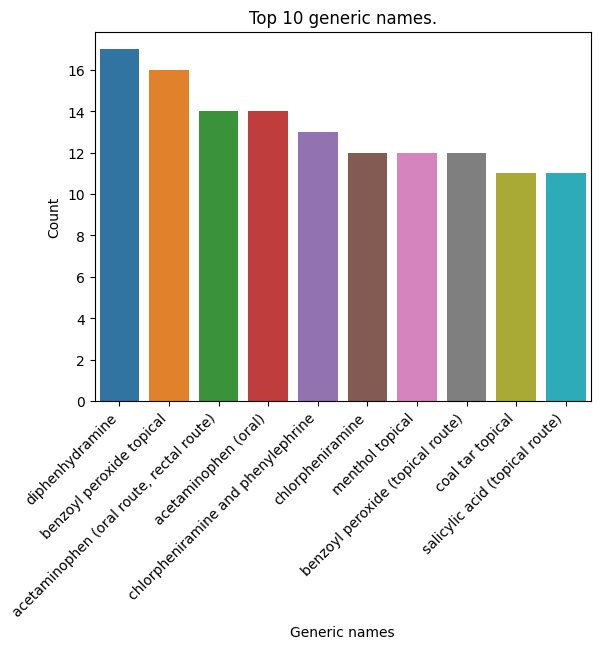

In [17]:
top_10_gen_name = df['generic_name'].value_counts().head(10)
ax_2 = sns.barplot( x = top_10_gen_name.index, y = top_10_gen_name.values)
ax_2.set(title = 'Top 10 generic names.')
ax_2.set_xticklabels(ax_2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Generic names')
plt.ylabel('Count')
plt.show()

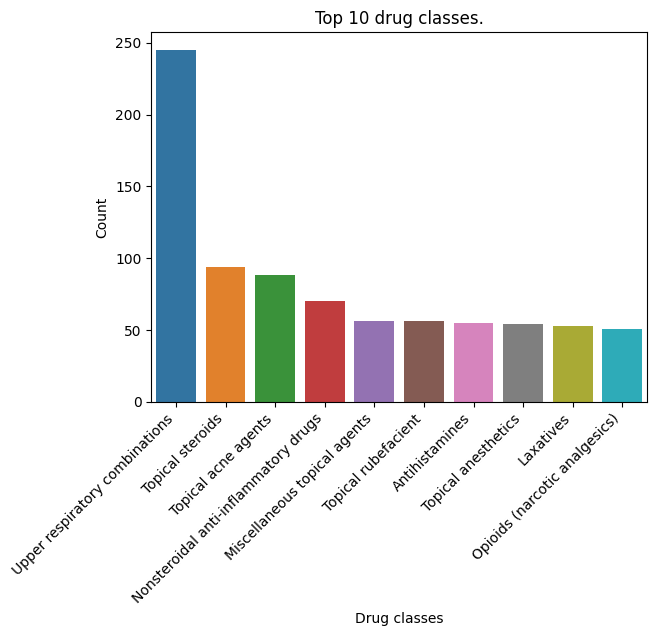

In [18]:
top_10_drug_classes = df['drug_classes'].value_counts().head(10)
ax_3 = sns.barplot( x = top_10_drug_classes.index, y = top_10_drug_classes.values)
ax_3.set(title = 'Top 10 drug classes.')
ax_3.set_xticklabels(ax_3.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Drug classes')
plt.ylabel('Count')
plt.show()

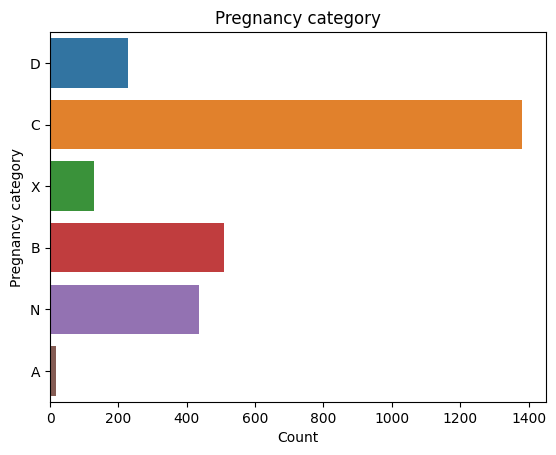

In [19]:
ax_4 = sns.countplot(y = df['pregnancy_category'], data = df)
ax_4.set(title = 'Pregnancy category')
#ax_4.set_xticklabels(ax_4.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Pregnancy category')
plt.xlabel('Count')
plt.show()

# NLP Model

Let's try to make NLP model that based on side effects figure out the drug class, thus sub-sequently it will be possilbe to find out the drug itself. There are 250 drug classes within 2931 lines so variance so more favorible than e.g. with the specific generic name what would be hard to train w/ higher precission. 

### Basic operations

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [484]:
dataset = df[['side_effects', 'drug_classes']].copy()

In [485]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   side_effects  2807 non-null   object
 1   drug_classes  2849 non-null   object
dtypes: object(2)
memory usage: 45.9+ KB


### Feature engineering

Taking into account premise "Thrash in, thresh out" we need to engineering the features to be used for NLP model in order to have clean tensors on X side (feature) as well as on Y side (labels). It is possible to automate and create the pipeline for all the functions, I will make it however step by step.

What we r gonna to do w/ X (feature) data:
 - At first to be done is removal of nan values
 - Then I will remove stop words, etc. to simplify it even more
 - Next step is to see the contribution of features' lenghts (n. of words) in order to avoid too long word chains if not neeed
 - We will tokenize the data and create vocabulary.
 - And to be completed by padding, w/ padding size to be set acc. to longest feature
 - Finally I will check whether the tensor shape corresponds to n. of rows x max. length defined 
 
Similar actions to be done on Y (labels) tensors.

In [486]:
dataset.isna().sum()

side_effects    124
drug_classes     82
dtype: int64

In [487]:
dataset.columns

Index(['side_effects', 'drug_classes'], dtype='object')

In [488]:
dataset.dropna(inplace = True)

In [489]:
dataset.reset_index(drop=True, inplace=True)

In [490]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740 entries, 0 to 2739
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   side_effects  2740 non-null   object
 1   drug_classes  2740 non-null   object
dtypes: object(2)
memory usage: 42.9+ KB


I will remove all non-alphabete characters as we are going to tokenize only the words build by alphabet characters by applying the easy function on chosen columns.

In [491]:
import re

def remove_nonchar(sentence):
    return re.sub('[^a-zA-Z]+'," ",sentence)

In [492]:
dataset['side_effects'] = dataset['side_effects'].apply(remove_nonchar)

In [493]:
dataset['drug_classes'] = dataset['drug_classes'].apply(remove_nonchar)

In [382]:
dataset.columns

Index(['side_effects', 'drug_classes'], dtype='object')

In [383]:
dataset['drug_classes']

0               Miscellaneous antimalarials Tetracyclines
1       Aldosterone receptor antagonists Potassium spa...
2                                           Tetracyclines
3       Miscellaneous antineoplastics Miscellaneous un...
4             Topical acne agents Vaginal anti infectives
                              ...                        
2735                           Anorexiants CNS stimulants
2736                           Anorexiants CNS stimulants
2737    Anorexiants CNS stimulants Miscellaneous antic...
2738                       Melanocortin receptor agonists
2739                       Melanocortin receptor agonists
Name: drug_classes, Length: 2740, dtype: object

In [384]:
dataset['side_effects']

0        hives difficult breathing swelling in your fa...
1       hives difficulty breathing swelling of your fa...
2       skin rash fever swollen glands flu like sympto...
3       problems with your vision or hearing muscle or...
4       hives difficult breathing swelling of your fac...
                              ...                        
2735    Along with its needed effects a medicine may c...
2736    hives difficulty breathing swelling of your fa...
2737    hives difficult breathing swelling of your fac...
2738    Imcivree may cause serious side effects includ...
2739    hives difficult breathing swelling of your fac...
Name: side_effects, Length: 2740, dtype: object

We have 2740 lines of clean data w/o nan values, numbers, special chars, etc. As for tokenization we are using words (not letters, etc.) let's have a look how long the features are --> how many words they contain and visualize the results.

In [385]:
length_items = []

for item in dataset['side_effects']:
    length_items.append(len(item.split()))

In [386]:
length_items = pd.DataFrame(length_items, columns=['n. of words'])

In [387]:
length_items.head()

,n. of words
0,216
1,80
2,207
3,166
4,79


In [388]:
# x = [value[1] for value in length_items]

In [389]:
length_items.describe()

,n. of words
count,2740.000000
mean,177.005109
std,173.679349
min,11.000000
25%,97.000000
50%,145.500000
75%,207.000000
max,5269.000000


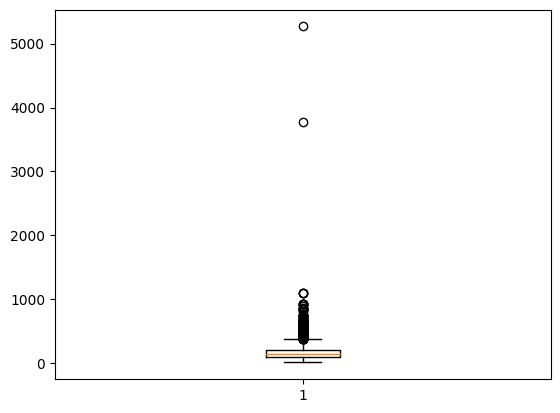

In [390]:
plt.boxplot(length_items)
plt.show()

We have two outliers which are lying too far from base data, let's have a look.

In [391]:
length_items.loc[length_items['n. of words'] > 3500]

,n. of words
1858,5269
2530,3781


In [392]:
dataset['side_effects'][1858]

'Infliximab can cause serious side effects including See Important information Serious Infections Some patients especially those years and older have had serious infections while receiving infliximab These serious infections include TB and infections caused by viruses fungi or bacteria that have spread throughout the body or cause infections in certain areas such as skin Some patients die from these infections If you get an infection while receiving treatment with infliximab your doctor will treat your infection and may need to stop your infliximab treatment Tell your doctor right away if you have any of the following signs of an infection while receiving or after receiving infliximab a fever have flu like symptoms feel very tired warm red or painful skin have a cough Your doctor will examine you for TB and perform a test to see if you have TB If your doctor feels that you are at risk for TB you may be treated with medicine for TB before you begin treatment with infliximab and during t

In [393]:
dataset['side_effects'][2530]

'WARNING CAUTION Even though it may be rare some people may have very bad and sometimes deadly side effects when taking a drug Tell your doctor or get medical help right away if you have any of the following signs or symptoms that may be related to a very bad side effect Signs of an allergic reaction like rash hives itching red swollen blistered or peeling skin with or without fever wheezing tightness in the chest or throat trouble breathing swallowing or talking unusual hoarseness or swelling of the mouth face lips tongue or throat Very bad skin irritation What are some other side effects of Coal Tar and Salicylic Acid All drugs may cause side effects However many people have no side effects or only have minor side effects Call your doctor or get medical help if any of these side effects or any other side effects bother you or do not go away Irritation where coal tar and salicylic acid is used These are not all of the side effects that may occur If you have questions about side effect

In [394]:
dataset.drop(labels = [1858, 2530], axis=0, inplace=True )

In [395]:
length_items_post = []

for item in dataset['side_effects']:
    length_items_post.append(len(item.split()))

In [396]:
data_X = dataset['side_effects']
data_y = dataset['drug_classes']

In [397]:
length_items_post = pd.DataFrame(length_items_post, columns=['n. of words'])

In [398]:
length_items_post

,n. of words
0,216
1,80
2,207
3,166
4,79
...,...
2733,294
2734,120
2735,259
2736,247


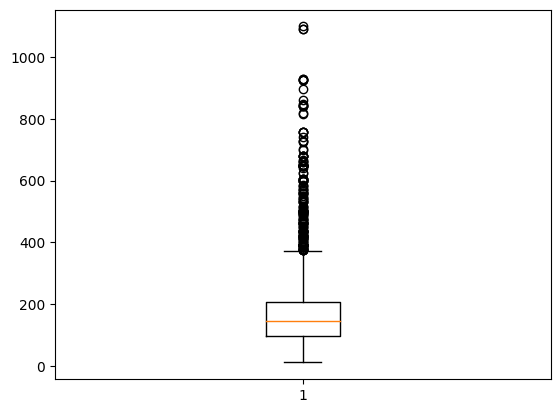

In [399]:
plt.boxplot(length_items_post)
plt.show()

It would be more convenient to have a function to recheck the length and sketch the box plot, so with the labels here we go ... However the data is even more clean and we can tokenize and pad the data. 

In [401]:
def n_words(sentence):
    
    length_items = []
    
    for item in sentence:
        length_items.append(len(item.split()))
    
    return length_items

In [407]:
length_labels = pd.DataFrame(n_words(dataset['drug_classes']), columns = ['n. of words'])

In [408]:
length_labels.describe()

,n. of words
count,2738.000000
mean,2.624909
std,1.409268
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,11.000000


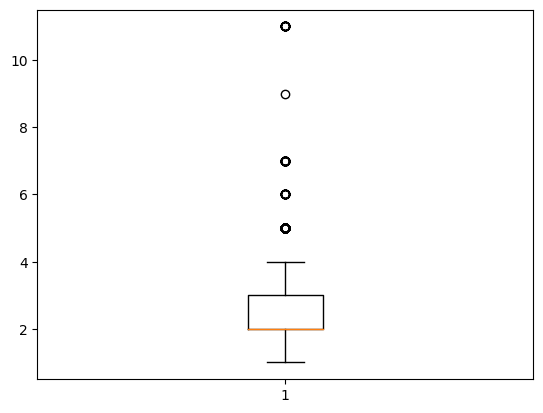

In [409]:
plt.boxplot(length_labels)
plt.show()

In [411]:
length_labels.loc[length_labels['n. of words'] > 8]

,n. of words
748,11
749,11
755,11
765,11
770,11
771,11
773,11
775,11
777,11
778,11


Dataset is not huge at all, so I will keep the data and padd the rest to total length 11.

In [420]:
data_X.shape, data_y.shape

((2738,), (2738,))

In [422]:
## Removing of stop words from data_X to decrease the complexity of data.

def remove_stopwords(sentence):
   

    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    sentence = sentence.lower()
    sentence_split = sentence.split()    
    result_words = [word for word in sentence_split if word not in stopwords]
    sentence = " ".join(result_words)
    

    return sentence

In [437]:
data_X_clean = data_X.apply(remove_stopwords)

In [438]:
data_y_clean = data_y.apply(remove_stopwords)

In [440]:
data_X_clean

0       hives difficult breathing swelling face throat...
1       hives difficulty breathing swelling face lips ...
2       skin rash fever swollen glands flu like sympto...
3       problems vision hearing muscle joint pain bone...
4       hives difficult breathing swelling face lips t...
                              ...                        
2735    along needed effects medicine may cause unwant...
2736    hives difficulty breathing swelling face lips ...
2737    hives difficult breathing swelling face lips t...
2738    imcivree may cause serious side effects includ...
2739    hives difficult breathing swelling face lips t...
Name: side_effects, Length: 2738, dtype: object

In [442]:
length_items_after = pd.DataFrame(n_words(data_X_clean), columns = ['n. of words'])
length_labels_after = pd.DataFrame(n_words(data_y_clean), columns = ['n. of words'])

In [443]:
length_items.describe(), length_items_after.describe()

(       n. of words
 count  2740.000000
 mean    177.005109
 std     173.679349
 min      11.000000
 25%      97.000000
 50%     145.500000
 75%     207.000000
 max    5269.000000,
        n. of words
 count  2738.000000
 mean    120.510592
 std      86.399219
 min       8.000000
 25%      66.000000
 50%     102.000000
 75%     144.000000
 max     680.000000)

I'm going to perform padding, it means for the shortest feature with only 11 words, we are going to apply "0" for all the words after the last word whereas the max is 680 words.

In [444]:
length_labels.describe(), length_labels_after.describe()

(       n. of words
 count  2738.000000
 mean      2.624909
 std       1.409268
 min       1.000000
 25%       2.000000
 50%       2.000000
 75%       3.000000
 max      11.000000,
        n. of words
 count  2738.000000
 mean      2.559533
 std       1.307184
 min       1.000000
 25%       2.000000
 50%       2.000000
 75%       3.000000
 max      10.000000)

#### We have cleaned the data quite efficiently! 
__Original shape for features:__ 2740 x 5269
<br>
__Clean shape of features:__ 2738 x 680

Thus the final features tensor has shape (rows/columns): __(2738, 680)__.

Because we would like to get the exact simple answer for question, we will tokenize the labels quite differently and we will keep only one column, even there are more words. 

The final label tensor will shape (rows/columns): __(2738, 1)__.

In [494]:
## Let's have a look on first line, how much we have cleared the data in one example. 

previous = len(dataset['side_effects'][150])
new = len(data_X_clean[150])
print(f'Previous length of first line = {previous} characters.')
print(f'New length of first line = {new} characters')
print(f'We have shortened the line for {100 - (new/previous)*100:.01f} %.')

Previous length of first line = 1536 characters.
New length of first line = 1160 characters
We have shortened the line for 24.5 %.


In [785]:
features_list = []

for item in data_X_clean:
    features_list.append(item)

In [786]:
len(features_list[0]), len(data_X_clean[0])

(1124, 1124)

In [787]:
## After removing stop words, let's tokenize the data. 

def fit_tokenizer(sentences):

    tokenizer = Tokenizer(oov_token="<oov>")  
    tokenizer.fit_on_texts(sentences)
    
    return tokenizer

In [788]:
tokenizer = fit_tokenizer(features_list)
word_index = tokenizer.word_index

print(f"Vocabulary from features_list contains {len(word_index)} words.\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")

Vocabulary from features_list contains 4736 words.

<OOV> token NOT included in vocabulary


In [789]:
## Let's pad the sequences now. 

def padded_features(tokenizer, data):

    sequences = tokenizer.texts_to_sequences(data)

    padded_features = pad_sequences(sequences, padding='post')

    
    return padded_features

In [790]:
padded_features = padded_features(tokenizer, features_list)
print(f"First padded feature looks like this: \n\n{padded_features[0]}\n")
print(f"Numpy array of all features has shape: {padded_features.shape}\n")
print(f"This means there are {padded_features.shape[0]} features in total and each one has a size of {padded_features.shape[1]}.")

First padded feature looks like this: 

[  23   46    9    8   13   10   14    6   63   28  109   10   70   47
    6    5   62  249    6   44  337  332  170   95  222   40  155   43
  229   63   80  333  685  672   59   42    4   25    6   44   28   86
  183  225   31   42   34  254   14   27   35  110  116    6   47   63
    4   32  637  393 1244   67  934  934    4   26   43    3    2   15
   11   14   12    5   49  287  133   10  125   41  115   30    5  114
   72 1043    7  127   53  161   93   58   94  202   38  341  368   28
  142   86  183   59  254   27  154    6  211  110   64   14  434  217
  138   29   21   50   20    5  597   47   18   65   85   12    5    4
  616   81   69   21   37   56   72  104   98   48  130  116    6   47
   17    3    2  934    4   25   21   37  165   12   18   65  128   49
    6   44   45  892    6  239  346   45  338    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0  

### As requried the padded shape (2738, 680) is equal to required shape (2738, 680) !

In [535]:
data_y_list = data_y_clean.to_list()

In [537]:
len(data_y_list)

2738

In [533]:
data_y_clean.unique().shape

(272,)

In [683]:
def label_dictionary(data):
    label_list = data.to_list()
    label_set = set(label_list)
    label_dict = {}
    for i, j in enumerate(label_set, start=4737):
        label_dict[j] = i
        
    return label_dict

In [684]:
label_sentence_index = label_dictionary(data_y_clean)

In [685]:
label_sentence_index

{'laxatives': 4737,
 'salicylates': 4738,
 'miscellaneous gi agents': 4739,
 'thiazide diuretics': 4740,
 'angiotensin ii inhibitors calcium channel blockers': 4741,
 'miscellaneous antineoplastics': 4742,
 'antirheumatics immunosuppressants': 4743,
 'barbiturate anticonvulsants': 4744,
 'integrase strand transfer inhibitor': 4745,
 'upper respiratory combinations': 4746,
 'antihyperlipidemic combinations': 4747,
 'topical non steroidal anti inflammatories': 4748,
 'inhaled corticosteroids': 4749,
 'glycoprotein platelet inhibitors': 4750,
 'benzodiazepine anticonvulsants benzodiazepines miscellaneous antiemetics': 4751,
 'estrogens': 4752,
 'calcium channel blocking agents group iv antiarrhythmics': 4753,
 'miscellaneous anticonvulsants': 4754,
 'carbamate anticonvulsants': 4755,
 'melanocortin receptor agonists': 4756,
 'mouth throat products': 4757,
 'gamma aminobutyric acid reuptake inhibitors': 4758,
 'miscellaneous antihyperlipidemic agents': 4759,
 'topical antipsoriatics': 4760

Dictionary size related to the data_X_clean is 4736 so obviously in order to avoid mix-up with this dictionary, the start number is 4737. As found out by unique there are 272 unique sentences (5008 - 4736 = 272), thus the dictionary (label sentence index) has new 272 values/indexes. Let's tokenize the labels now with the newly created dictionary.

In [669]:
def label_tokenize(data):
    label_list = data.to_list()
    label_tokenized = []
    for item in label_list:
        for key, value in label_sentence_index.items():
            if item == key:
                label_tokenized.append(value)

    return label_tokenized

In [670]:
label_tokenized = label_tokenize(data_y_clean)

In [671]:
label_tokenized[:5]

[4851, 4848, 4989, 4881, 4890]

In [672]:
data_y_clean

0               miscellaneous antimalarials tetracyclines
1       aldosterone receptor antagonists potassium spa...
2                                           tetracyclines
3       miscellaneous antineoplastics miscellaneous un...
4             topical acne agents vaginal anti infectives
                              ...                        
2735                           anorexiants cns stimulants
2736                           anorexiants cns stimulants
2737    anorexiants cns stimulants miscellaneous antic...
2738                       melanocortin receptor agonists
2739                       melanocortin receptor agonists
Name: drug_classes, Length: 2738, dtype: object

So far so good ... let's put all the data into numpy df and split into train/test data. 

In [673]:
type(label_tokenized), type(padded_features)

(list, numpy.ndarray)

In [674]:
label_tokenized_array = np.array(label_tokenized)

In [675]:
padded_features.shape, label_tokenized_array.shape

((2738, 680), (2738,))

In [676]:
label_tokenized_array = np.reshape(label_tokenized_array, (2738,1))

In [677]:
label_tokenized_array.shape

(2738, 1)

In [678]:
dataset_final = np.concatenate((padded_features, label_tokenized_array), axis=1)

In [628]:
dataset_final[0]

array([  23,   46,    9,    8,   13,   10,   14,    6,   63,   28,  109,
         10,   70,   47,    6,    5,   62,  249,    6,   44,  337,  332,
        170,   95,  222,   40,  155,   43,  229,   63,   80,  333,  685,
        672,   59,   42,    4,   25,    6,   44,   28,   86,  183,  225,
         31,   42,   34,  254,   14,   27,   35,  110,  116,    6,   47,
         63,    4,   32,  637,  393, 1244,   67,  934,  934,    4,   26,
         43,    3,    2,   15,   11,   14,   12,    5,   49,  287,  133,
         10,  125,   41,  115,   30,    5,  114,   72, 1043,    7,  127,
         53,  161,   93,   58,   94,  202,   38,  341,  368,   28,  142,
         86,  183,   59,  254,   27,  154,    6,  211,  110,   64,   14,
        434,  217,  138,   29,   21,   50,   20,    5,  597,   47,   18,
         65,   85,   12,    5,    4,  616,   81,   69,   21,   37,   56,
         72,  104,   98,   48,  130,  116,    6,   47,   17,    3,    2,
        934,    4,   25,   21,   37,  165,   12,   

In [630]:
from sklearn.model_selection import train_test_split

In [631]:
X_train, X_test, y_train, y_test = train_test_split(padded_features, label_tokenized_array, test_size=0.1, shuffle = True)

In [632]:
X_train, X_test

(array([[231, 224,   2, ...,   0,   0,   0],
        [ 23,  46,   9, ...,   0,   0,   0],
        [ 23,  46,   9, ...,   0,   0,   0],
        ...,
        [ 23,  46,   9, ...,   0,   0,   0],
        [ 28, 225,  31, ...,   0,   0,   0],
        [ 23,  46,   9, ...,   0,   0,   0]]),
 array([[ 23,  87,   9, ...,   0,   0,   0],
        [ 23,  45,  14, ...,   0,   0,   0],
        [231, 224,   2, ...,   0,   0,   0],
        ...,
        [  8, 198,  12, ...,   0,   0,   0],
        [ 23,  87,   9, ...,   0,   0,   0],
        [ 30,   5, 248, ...,   0,   0,   0]]))

In [633]:
y_train, y_test

(array([[719],
        [690],
        [708],
        ...,
        [824],
        [708],
        [950]]),
 array([[867],
        [892],
        [899],
        [874],
        [730],
        [708],
        [835],
        [715],
        [794],
        [684],
        [784],
        [736],
        [824],
        [772],
        [865],
        [930],
        [832],
        [887],
        [690],
        [947],
        [838],
        [881],
        [930],
        [705],
        [681],
        [778],
        [824],
        [928],
        [838],
        [907],
        [690],
        [856],
        [847],
        [917],
        [841],
        [703],
        [951],
        [849],
        [768],
        [771],
        [897],
        [902],
        [859],
        [907],
        [882],
        [951],
        [838],
        [716],
        [859],
        [749],
        [690],
        [824],
        [899],
        [900],
        [827],
        [865],
        [868],
        [772],
        [939],
        [8

In [648]:
y_train = np.reshape(y_train, (2464, ))

In [650]:
y_test = np.reshape(y_test, (274, ))

In [651]:
X_train.shape, y_train.shape

((2464, 680), (2464,))

In [652]:
X_test.shape, y_test.shape

((274, 680), (274,))

In [800]:
## Build the Tensorflow model.

import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5008, 16, input_length=680),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 680, 16)           80128     
                                                                 
 flatten_12 (Flatten)        (None, 10880)             0         
                                                                 
 dense_24 (Dense)            (None, 32)                348192    
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 1)                 17        
                                                                 
Total params: 428,865
Trainable params: 428,865
Non-trainable params: 0
_________________________________________________________________


In [801]:
## Let's train the model

num_epochs = 20

model.fit(X_train, y_train, epochs=num_epochs,  validation_data=(X_test, y_test))

Epoch 1/20
77/77 [==============================] - 1s 9ms/step - loss: -133646.9219 - accuracy: 0.0000e+00 - val_loss: -586747.9375 - val_accuracy: 0.0000e+00
Epoch 2/20
77/77 [==============================] - 0s 6ms/step - loss: -3286462.0000 - accuracy: 0.0000e+00 - val_loss: -8792413.0000 - val_accuracy: 0.0000e+00
Epoch 3/20
77/77 [==============================] - 1s 7ms/step - loss: -24171800.0000 - accuracy: 0.0000e+00 - val_loss: -48964432.0000 - val_accuracy: 0.0000e+00
Epoch 4/20
77/77 [==============================] - 0s 6ms/step - loss: -97614872.0000 - accuracy: 0.0000e+00 - val_loss: -167186640.0000 - val_accuracy: 0.0000e+00
Epoch 5/20
77/77 [==============================] - 1s 6ms/step - loss: -279693728.0000 - accuracy: 0.0000e+00 - val_loss: -430286240.0000 - val_accuracy: 0.0000e+00
Epoch 6/20
77/77 [==============================] - 0s 6ms/step - loss: -645611200.0000 - accuracy: 0.0000e+00 - val_loss: -921959936.0000 - val_accuracy: 0.0000e+00
Epoch 7/20
77/77 

Let's check this out. In order to get the prediction, we will prepare the pipeline :
- remove the stop words
- tokenize the words
- padd the sentences to size (6030,)
 
then, get the prediction

In [923]:
# own tokenizer for the prediction. As the input is array (1,680) the intetion is to tokenize the known words from 

question = 'What the heck is going on here, I have pain, and fever, and some stomach issues and diziness. '

type(question)

import re

def tokenize_question(sentence):
    words = re.sub(r'[^\w\s]', '', sentence)
    words = words.split()
    tokens = []
    for word in words:
        if word in word_index.keys():
            tokens.append(word_index[word])
        
    return tokens

def padding_question(sentence):
    length = 680      # bespoken watch out!!!
    length_padding = length - len(sentence)
    sentence_array = np.array(sentence)
    sentence_array = np.append(sentence_array, length_padding * [0])
    
    return sentence_array

tokenized_question = tokenize_question(question)

padded_question = padding_question(tokenized_question)

In [930]:
padded_question = padded_question.reshape(1,680)

In [931]:
padded_question.shape

(1, 680)

In [932]:
model.predict(padded_question)

1/1 [==============================] - 0s 36ms/step


array([[1.]], dtype=float32)

In [942]:
padded_question

array([[2122,    5,   28,   12,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

# RESULT:

Due to very low volume of the data, NLP model not possible to create. The accuracy is way low to be considered as model.